In [1]:
import os
print("WORKING DIR:", os.getcwd())
print("FILES:", os.listdir())


WORKING DIR: /Users/zeinakellybenton/galactic
FILES: ['MESA-Web_Job_09282554300', 'mesaweb_nuc_convec_solar2_log.png', 'task16.ipynb', 'mesaweb_nuc_convec_solar.png', 'Untitled1.ipynb', '.DS_Store', 'mesaweb_nuc_convec_solar3_log.png', 'Untitled3.ipynb', 'Blank_Project_1_AST4300_Notebook.ipynb', 'Untitled.ipynb', 'Task15.ipynb', 'Untitled4.ipynb', 'task16.py', 'StarFlow_age_posterior_v1_0_0.fits', 'Untitled2.ipynb', 'MESA-Web_Job_09262554202', 'StarFlow_summary_v1_0_0.fits', 'MESA-Web_Job_09282554314', 'astraAllStarASPCAP-0.6.0.fits', 'apjsad9feft4_mrt.txt', 'mesaweb_nuc_convec_solar2.png', 'mesaweb_nuc_convec_solar3.png', '.ipynb_checkpoints', 'MESA-Web_Job_09282554298', 'allStar-dr17-synspec.fits', '.vscode']


In [2]:
#%%
import pandas as pd

#APOKASC3 catalog Pinsonneault2025
names = [
    "KIC","EvolState","ESSource","CatTab","SeisSource","SpecSource",
    "NNumax","NDNu","Nquar",
    "Numax","e_Numax","DNu","e_DNu","FDNu","e_FDNu","FNumax",
    "Mass","e_Mass","Radius","e_Radius",
    "logg_Seis","e_logg_Seis","Teff","e_Teff",
    "logg_Spec","e_logg_Spec","FeH","e_FeH",
    "aFe","e_aFe","CFe","e_CFe","NFe","e_NFe",
    "InvRGaia","e_InvRGaia","AgeCat",
    "AgeRGB","E_AgeRGB","e_AgeRGB",
    "AgeRC","E_AgeRC","e_AgeRC",
    "vsini","alphaCat","GaiaDR3","TMASS"
]

file = "apjsad9feft4_mrt.txt"
start_line = 0
with open(file) as f:
    for i, line in enumerate(f):
        if line.startswith("  ") and line.strip().split()[0].isdigit():  
            start_line = i
            break

APOKASC3 = pd.read_fwf(file, names=names, skiprows=start_line)
APOKASC3 = APOKASC3[APOKASC3["AgeRGB"] != -9999.0000] #remove all bad age sources
valid = APOKASC3[(APOKASC3["AgeRGB"] > -1) & (APOKASC3["AgeRGB"] < 1.2)]

valid["Age_Gyr"] = 10**valid["AgeRGB"]


APOKASC3


/var/folders/ct/3p6ngzhj6xbcrqtyd_rkdsn00000gn/T/ipykernel_1189/1756745769.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Age_Gyr"] = 10**valid["AgeRGB"]


,KIC,EvolState,ESSource,CatTab,SeisSource,SpecSource,NNumax,NDNu,Nquar,Numax,...,AgeRGB,E_AgeRGB,e_AgeRGB,AgeRC,E_AgeRC,e_AgeRC,vsini,alphaCat,GaiaDR3,TMASS
893214,RGB,Seis,Gold,WAvg,DR17,8,5,15,40.5841,0.2874,...,0.2980,-0.2639,2.8815,0.2980,-0.2639,0.0,Apoor,2050237616959273728,2MASS,J19245967+3638183
1026309,RGB,Seis,Silver,WAvg,DR17,8,4,18,16.6974,0.5675,...,0.1481,-0.1090,0.7082,0.1832,-0.1405,0.0,Apoor,2050236934071312384,2MASS,J19242636+3643594
1027110,RGB,Seis,Silver,WAvg,DR17,8,4,18,6.5198,0.1616,...,8.0551,-3.8133,7.2088,4.6171,-2.3475,0.0,Arich,2050239201814200192,2MASS,J19250937+3644599
1027337,RGB,Seis,Gold,WAvg,DR17,9,6,18,74.3689,0.4491,...,0.5953,-0.5247,5.8519,0.5953,-0.5247,0.0,Apoor,2050240782362231552,2MASS,J19252021+3647118
1027707,RGB,Seis,Silver,WAvg,DR17,6,3,18,3.0206,0.0885,...,0.6198,-0.3779,1.5494,0.4593,-0.4138,0.0,Apoor,2050240129527252096,2MASS,J19253846+3646103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783857,RGB,Seis,Gold,WAvg,DR17,8,5,18,78.3331,0.5548,...,0.8616,-0.7026,6.3168,0.8616,-0.7026,0.0,Arich,2139302014478048512,2MASS,J19183970+5205338
2785250,RGB,Spec,Gold,WAvg,DR17,9,6,8,33.0520,0.1996,...,0.5163,-0.4558,4.4587,0.5163,-0.4558,0.0,Apoor,2139269574588790400,2MASS,J19214766+5205365
2785401,RGB,Seis,Silver,WAvg,DR17,5,3,2,15.9445,0.6038,...,22.9696,-8.2623,11.4791,9.5467,-4.6335,0.0,Apoor,2139266383430424704,2MASS,J19221167+5202332
2884116,RGB,Seis,Gold,WAvg,DR17,9,6,8,50.7865,0.3067,...,1.0086,-0.7863,7.6715,1.0086,-0.7863,0.0,Apoor,2139312837795971840,2MASS,J19182431+5215519


In [3]:
print(valid)

         KIC EvolState ESSource CatTab SeisSource  SpecSource  NNumax  NDNu  \
893214   RGB      Seis     Gold   WAvg       DR17           8       5    15   
1026309  RGB      Seis   Silver   WAvg       DR17           8       4    18   
1027337  RGB      Seis     Gold   WAvg       DR17           9       6    18   
1027707  RGB      Seis   Silver   WAvg       DR17           6       3    18   
1162036  RGB      Spec   Silver   WAvg       DR17           6       4     4   
...      ...       ...      ...    ...        ...         ...     ...   ...   
2737278  RGB      Seis     Gold   WAvg       DR17           8       5    17   
2783857  RGB      Seis     Gold   WAvg       DR17           8       5    18   
2785250  RGB      Spec     Gold   WAvg       DR17           9       6     8   
2884116  RGB      Seis     Gold   WAvg       DR17           9       6     8   
2885196  RGB      Seis     Gold   WAvg       DR17           8       5    16   

            Nquar   Numax  ...  E_AgeRGB  e_AgeRGB 

In [4]:
# %%
from astropy.io import fits
import pandas as pd
import numpy as np
fits_path = "StarFlow_summary_v1_0_0.fits"

with fits.open(fits_path) as hdul:
    data = hdul[1].data  # BinTableHDU

data_dict = {}

for colname in data.names:
    col = data[colname]
    
    # If numeric, convert to native byte order
    if isinstance(col[0], (np.integer, np.floating)):
        data_dict[colname] = col.byteswap().view(col.dtype.newbyteorder())
    else:
        # Strings: decode bytes if needed
        if np.issubdtype(col.dtype, np.bytes_):
            data_dict[colname] = col.astype(str)
        else:
            data_dict[colname] = col


Starflow = pd.DataFrame(data_dict)
Starflow


,sdss_id,sdss4_apogee_id,catalogid,age,e_p_age,e_n_age,mass,e_p_mass,e_n_mass,training_density,BITMASK
0,54968703,2M03455109+5955388,63050394798264488,5.535536,7.329329,3.713714,0.080051,0.144509,0.001737,1.786528e+10,2
1,116010946,2M03455125+3159498,63050396568859167,5.465465,7.497497,3.391391,0.057774,0.121443,-0.016859,1.963289e+10,2
2,114979218,2M03521555+1818064,63050396552439324,4.526527,6.418418,2.606607,0.077874,0.136956,0.009470,1.505021e+10,3
3,115031735,2M03521570+2245296,63050396552988608,3.223223,5.143143,1.009009,-0.000871,0.146377,-0.238708,8.614447e+08,2
4,114941357,2M03521583+1251133,63050396551977516,2.984985,4.442442,1.499499,0.161038,0.224625,0.084372,2.417527e+10,2
...,...,...,...,...,...,...,...,...,...,...,...
1059516,94596811,2M03484545-1058335,63050395811882387,NaN,NaN,NaN,-0.003495,0.123413,-0.199790,0.000000e+00,0
1059517,55105597,2M03484564+6905141,63050394801274341,14.000000,13.971944,13.158317,0.159232,0.270382,0.004330,6.570968e+06,0
1059518,76059297,2M03484598-0604083,63050395128340475,14.000000,13.971944,13.607214,0.125374,0.200625,0.029441,9.323465e-02,0
1059519,116051329,2M03484604+3913412,63050396569537105,1.010020,1.935872,0.056112,0.244404,0.302767,0.175220,1.849330e+10,2


In [5]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy.table import hstack

# --- Load DR19 FITS (your file) ---

filename = "astraAllStarASPCAP-0.6.0.fits"
tb = fits.open(filename)
data = tb[2].data


apogee_ids = np.array(data['sdss4_apogee_id'], dtype='U20')  # unicode string
mask = (data['zgr_plx']>0)

apogee_ids = apogee_ids[mask]

# Starflow IDs
starflow_ids = np.array(Starflow['sdss4_apogee_id'], dtype='U20')

# Fast intersection
intersect_ids, ind_starflow, ind_dr17 = np.intersect1d(
    starflow_ids, apogee_ids, return_indices=True
)

# Extract matched Starflow rows
matched_starflow = Starflow.iloc[ind_starflow]

# Extract matched DR17 rows as a minimal dict
matched_dr171 = {name: data[name][mask][ind_dr17] for name in ['sdss4_apogee_id','zgr_plx','teff','logg']}

print("Matched Starflow rows:", matched_starflow.shape)
print("Matched DR17 rows:", len(matched_dr171['sdss4_apogee_id']))
matched_starflow

Matched Starflow rows: (564576, 11)
Matched DR17 rows: 564576


,sdss_id,sdss4_apogee_id,catalogid,age,e_p_age,e_n_age,mass,e_p_mass,e_n_mass,training_density,BITMASK
120136,58640897,,27021597919617849,5.451451,7.273273,3.643644,0.099167,0.153769,0.034293,2.815249e+10,2
486906,85995134,19140272-1554055,63050395561720686,5.815816,7.497497,4.134134,0.111459,0.164627,0.050862,2.891514e+10,2
486907,85993595,19155129-1617591,63050395561662195,2.228228,3.825826,0.448448,0.133129,0.183854,0.075686,2.421080e+10,2
486909,85993872,19171130-1603082,63050395561671356,1.289289,2.158158,0.420420,0.319350,0.390744,0.233866,5.796158e+09,2
486910,85990324,19180978-1616222,63050395561533253,2.256256,3.601602,0.896897,0.200625,0.257587,0.135047,2.798962e+10,2
...,...,...,...,...,...,...,...,...,...,...,...
781337,115783262,Y_Aur,63050396563780007,0.000000,0.729459,0.000000,0.429328,0.476250,0.350730,3.370705e+03,0
781959,65304864,Y_Lac,63050394932304110,8.164329,11.194389,5.218437,0.012017,0.135047,-0.167901,2.577377e+05,0
782483,85898864,Y_Oph,63050395557497704,6.901804,8.977956,4.713427,0.251777,0.364481,0.097084,8.322311e+03,0
784623,84206346,Y_Sgr,63050395401052107,11.138277,13.410822,8.781563,-0.036288,0.077874,-0.195673,1.945175e+04,0


In [6]:

filename='astraAllStarASPCAP-0.6.0.fits'
tb = fits.open(filename)
data = tb[2].data

# Minimal DR19 columns to speed things up
dr17_apogee_ids = np.array(data['sdss4_apogee_id'], dtype='U20')
mask = (data['zgr_plx']>0)

dr17_apogee_ids = dr17_apogee_ids[mask]
dr17_teff = data['teff'][mask]
dr17_logg = data['logg'][mask]

# Convert DR19 2M IDs to J format for matching APOKASC3
dr17_j_ids = np.array([x.replace('2M','J') for x in dr17_apogee_ids], dtype='U20')
apokasc_ids = np.array(valid['TMASS'], dtype='U20')


intersect_ids, ind_dr17, ind_apokasc = np.intersect1d(dr17_j_ids, apokasc_ids, return_indices=True)

matched_dr17 = {
    'sdss4_apogee_id': dr17_apogee_ids[ind_dr17],
    'teff': dr17_teff[ind_dr17],
    'logg': dr17_logg[ind_dr17]
}
matched_apokasc = valid.iloc[ind_apokasc]
print("Matched DR17 rows:", len(matched_dr17['sdss4_apogee_id']))
print("Matched APOKASC3 rows:", len(matched_apokasc))
matched_apokasc

Matched DR17 rows: 4423
Matched APOKASC3 rows: 4423


,KIC,EvolState,ESSource,CatTab,SeisSource,SpecSource,NNumax,NDNu,Nquar,Numax,...,E_AgeRGB,e_AgeRGB,AgeRC,E_AgeRC,e_AgeRC,vsini,alphaCat,GaiaDR3,TMASS,Age_Gyr
8004637,RGB,Seis,Gold,WAvg,DR17,8,6,18,86.7797,0.5240,...,-0.8300,7.5685,1.0487,-0.8300,0.0,Apoor,2117126509915136384,2MASS,J18401969+4348380,11.186649
8004863,RGB,Seis,Gold,WAvg,DR17,9,6,18,96.9833,0.5856,...,-0.2705,3.0541,0.2906,-0.2705,0.0,Apoor,2117149874537225344,2MASS,J18405556+4353012,1.952540
7936033,RGB,Seis,Gold,WAvg,DR17,10,7,18,14.2713,0.0837,...,-0.9790,6.8003,0.8711,-0.4918,0.0,Arich,2117125719641154176,2MASS,J18405585+4347083,15.714479
7798102,RGB,Seis,Gold,WAvg,DR17,8,5,9,44.2947,0.3137,...,-0.7566,6.2556,0.9271,-0.7566,0.0,Arich,2116928426023065088,2MASS,J18405622+4330369,8.454735
8073887,RGB,Seis,Gold,WAvg,DR17,9,6,18,190.4381,1.1499,...,-0.6148,6.5965,0.7825,-0.6148,0.0,Apoor,2116969387130311040,2MASS,J18413176+4358551,6.060382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8462113,RGB,Seis,Gold,WAvg,DR17,9,6,4,13.5185,0.0816,...,-0.6389,5.1459,0.4521,-0.3159,0.0,Apoor,2081892423592121600,2MASS,J20051431+4425508,6.282030
8526677,RGB,Spec,Gold,WAvg,DR17,7,5,4,95.8197,0.6786,...,-0.2931,3.2857,0.3409,-0.2931,0.0,Apoor,2081913864069464064,2MASS,J20055060+4432141,2.192300
8332266,RGB,Seis,Gold,WAvg,DR17,9,6,8,60.7054,0.3666,...,-0.6750,7.0336,0.8247,-0.6750,-9999.0,Apoor,2081875789170617344,2MASS,J20055400+4415544,6.678824
8527188,RGB,Seis,Gold,WAvg,DR17,9,5,4,22.1584,0.1338,...,-0.4284,4.4954,0.4925,-0.4284,0.0,Apoor,2081909053705931648,2MASS,J20063113+4435192,3.108136


In [7]:
# Setting Up The Neural Network According To Steps Taken In The Project
from astropy.table import Table
from astropy.io import fits
import pandas as pd
import numpy as np
import os
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits, ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
#APOKASC3
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
intersect_ids, ind_dr17, ind_apokasc = np.intersect1d(dr17_j_ids, apokasc_ids, return_indices=True)

features = ['teff','logg','m_h_atm','alpha_m_atm','c_h','n_h']
matched_dr17_rows = {name: data[name][mask][ind_dr17] for name in features}

matched_apok_rows = valid.iloc[ind_apokasc]

# training arrays
fullx = np.column_stack([matched_dr17_rows[name] for name in features])
fully = matched_apok_rows['Age_Gyr'].values

# remove NaNs
mask_finite = np.isfinite(fullx).all(axis=1) & np.isfinite(fully)
fullx = fullx[mask_finite]
fully = fully[mask_finite]

scaling_x = np.median(fullx, axis=0)
scaling_y = np.median(fully, axis=0)
fullx, fully = fullx/scaling_x, fully/scaling_y


neurons_per_layer=12
layers=3
iterations=100
inputs = keras.Input(shape=(6,))
layer1 =keras.layers.Dense(neurons_per_layer, activation='relu')(inputs)
layer2 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer1)
layer3 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer2)
layer4 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer3)
layer5 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer4)
layer6 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer5)
layer7 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer6)
layer8 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer7)
layer9 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer8)
layer10 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer9)
layer11 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer10)
layer12 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer11)
layer13 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer12)
layer14 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer13)
layer15 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer14)
layer16 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer15)
layer17 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer16)
layer18 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer17)
layer19 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer18)
layer20 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer19)
layer21 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer20)
layer22 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer21)
layer23 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer22)
outputs = keras.layers.Dense(1)(layer4)
model = keras.Model(inputs=inputs, outputs=outputs, name='test')
model.summary()
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# Setting The Correct Data Catalogue For Analysis
tenpercent = len(fully) // 10  
trainbin=slice(0,-1*tenpercent-1) # Using last name before M 
testing=slice(-1*tenpercent,-1) # Using last name before M 
x_train, y_train = fullx[trainbin], fully[trainbin]
x_test, y_test = fullx[testing], fully[testing]
model.fit(x_train, y_train, epochs=iterations, validation_split=0.05, batch_size=300)
predictions = model.predict(x_test).flatten()
print(len(predictions))
metric=0.3
goodfit=np.where(((1-metric) < predictions/y_test) & ((1+metric) > predictions/y_test)) 
badfit=np.where(((1-metric) > predictions/y_test) | ((1+metric) < predictions/y_test))


Model: "test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 12)                84        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_23 (Dense)            (None, 1)                 13        
                                                                 
Total params: 565 (2.21 KB)
Trainable params: 565 (2.21 KB)
No

Epoch 1/100
12/12 [==============================] - 1s 10ms/step - loss: 1.9523 - accuracy: 0.0000e+00 - val_loss: 1.4934 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1.7145 - accuracy: 0.0000e+00 - val_loss: 1.3508 - val_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5929 - accuracy: 2.8329e-04 - val_loss: 1.2669 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5002 - accuracy: 2.8329e-04 - val_loss: 1.1857 - val_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1.4095 - accuracy: 2.8329e-04 - val_loss: 1.1082 - val_accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1.3167 - accuracy: 2.8329e-04 - val_loss: 1.0346 - val_accuracy: 0.0000e+00
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1.2279 - accuracy: 2.8329e-04 - 

With  12 neurons per layer,  3 layers, and  100 iterations
using the training set slice(0, -413, None)
38.19951338199513 percent of the ages are good
61.80048661800487 percent of the ages are bad
1.022821856934045 15.84528299328705


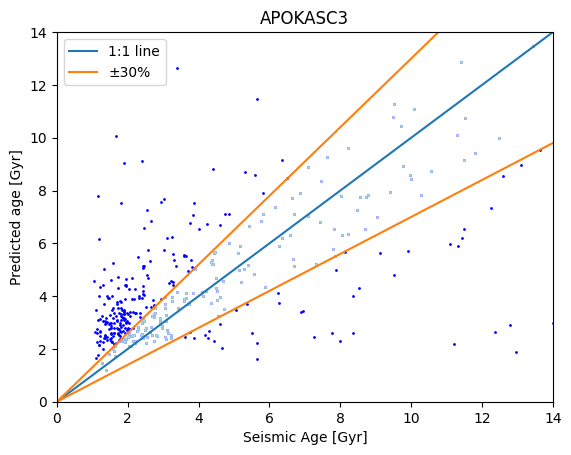

In [8]:
print ('With ', neurons_per_layer, 'neurons per layer, ', layers, 'layers, and ', iterations, 'iterations')
print ('using the training set', trainbin)
print (len(goodfit[0])/len(y_test)*100, 'percent of the ages are good')
print (len(badfit[0])/len(y_test)*100, 'percent of the ages are bad')
plt.scatter( (y_test*scaling_y),(predictions*scaling_y), s=1, color='blue')
plt.scatter( (y_test[goodfit]*scaling_y),(predictions[goodfit]*scaling_y), s=1, color='lightblue')
plt.xlim(0.,14.)
plt.xlim(0.,14.)
plt.plot([0.,14.], [0.,14.], label='1:1 line')
plt.plot([14,0,14], [14*(1-metric), 0, 14*(1+metric)], label='±30%')
plt.ylabel(r'Predicted age [Gyr]')
plt.xlabel(r'Seismic Age [Gyr]')
plt.title("APOKASC3")
plt.legend()
plt.ylim(0,14)
print(valid['Age_Gyr'].min(), valid['Age_Gyr'].max())


In [9]:
#Apokasc3 age versus predicted age NN
delta = predictions - y_test
delta = (predictions - y_test) * scaling_y
y_test_actual = y_test * scaling_y
#rescale delta back into age units

/var/folders/ct/3p6ngzhj6xbcrqtyd_rkdsn00000gn/T/ipykernel_1189/545646794.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


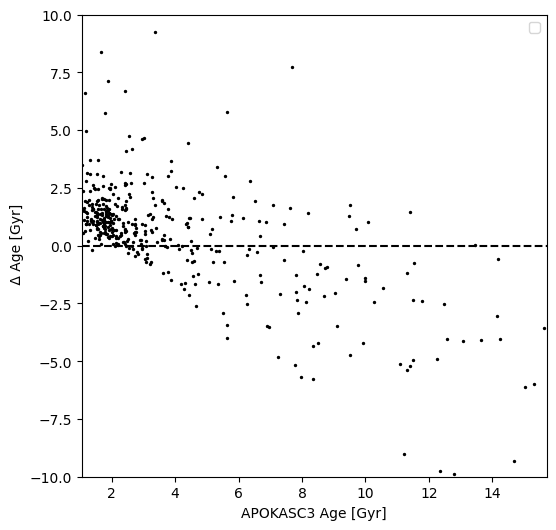

In [10]:
metric = 0.3
goodfit = (predictions / y_test > 1 - metric) & (predictions / y_test < 1 + metric)
badfit  = ~goodfit


plt.figure(figsize=(6,6))
plt.scatter(y_test_actual[goodfit], delta[goodfit], s=2, color='black')
plt.scatter(y_test_actual[badfit],  delta[badfit],  s=2, color='black')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel("APOKASC3 Age [Gyr]")
plt.ylabel(" Δ Age [Gyr]")
plt.xlim(y_test_actual.min(), y_test_actual.max())
plt.ylim(-10,10)
plt.legend()
plt.show()


In [11]:
# Setting Up The Neural Network According To Steps Taken In The Project

#Starflow

from astropy.table import Table
from astropy.io import fits
import pandas as pd
import numpy as np
import os
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits, ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
intersect_ids, ind_starflow, ind_dr17 = np.intersect1d(
    starflow_ids, apogee_ids, return_indices=True
)
features = ['teff','logg','m_h_atm','alpha_m_atm','c_h','n_h']
matched_dr17_rows = {name: data[name][mask][ind_dr17] for name in features}

matched_starflow_rows = Starflow.iloc[ind_starflow].copy()

# Build training arrays
fullx = np.column_stack([matched_dr17_rows[name] for name in features])
fully = matched_starflow_rows['age'].values  

# Remove NaNs
mask_finite = np.isfinite(fullx).all(axis=1) & np.isfinite(fully)
fullx = fullx[mask_finite]
fully = fully[mask_finite]

scaling_x = np.median(fullx, axis=0)
scaling_y = np.median(fully, axis=0)
fullx, fully = fullx/scaling_x, fully/scaling_y


neurons_per_layer=12
layers=3
iterations=100
inputs = keras.Input(shape=(6,))
layer1 =keras.layers.Dense(neurons_per_layer, activation='relu')(inputs)
layer2 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer1)
layer3 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer2)
layer4 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer3)
layer5 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer4)
layer6 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer5)
layer7 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer6)
layer8 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer7)
layer9 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer8)
layer10 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer9)
layer11 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer10)
layer12 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer11)
layer13 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer12)
layer14 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer13)
layer15 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer14)
layer16 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer15)
layer17 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer16)
layer18 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer17)
layer19 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer18)
layer20 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer19)
layer21 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer20)
layer22 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer21)
layer23 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer22)
outputs = keras.layers.Dense(1)(layer4)
model = keras.Model(inputs=inputs, outputs=outputs, name='test')
model.summary()
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# Setting The Correct Data Catalogue For Analysis
tenpercent = len(fully) // 10  
trainbin=slice(0,-1*tenpercent-1) # Using last name before M 
testing=slice(-1*tenpercent,-1) # Using last name before M 
x_train, y_train = fullx[trainbin], fully[trainbin]
x_test, y_test = fullx[testing], fully[testing]
model.fit(x_train, y_train, epochs=iterations, validation_split=0.05, batch_size=300)
predictions = model.predict(x_test).flatten()
print(len(predictions))
metric=0.3
goodfit=np.where(((1-metric) < predictions/y_test) & ((1+metric) > predictions/y_test)) 
badfit=np.where(((1-metric) > predictions/y_test) | ((1+metric) < predictions/y_test))


Model: "test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_24 (Dense)            (None, 12)                84        
                                                                 
 dense_25 (Dense)            (None, 12)                156       
                                                                 
 dense_26 (Dense)            (None, 12)                156       
                                                                 
 dense_27 (Dense)            (None, 12)                156       
                                                                 
 dense_47 (Dense)            (None, 1)                 13        
                                                                 
Total params: 565 (2.21 KB)
Trainable params: 565 (2.21 KB)
No

Epoch 1/100
1424/1424 [==============================] - 1s 696us/step - loss: 0.1293 - accuracy: 0.0117 - val_loss: 0.0501 - val_accuracy: 0.0056
Epoch 2/100
1424/1424 [==============================] - 1s 653us/step - loss: 0.0522 - accuracy: 0.0142 - val_loss: 0.0312 - val_accuracy: 0.0063
Epoch 3/100
1424/1424 [==============================] - 1s 626us/step - loss: 0.0413 - accuracy: 0.0147 - val_loss: 0.0265 - val_accuracy: 0.0063
Epoch 4/100
1424/1424 [==============================] - 1s 627us/step - loss: 0.0387 - accuracy: 0.0150 - val_loss: 0.0247 - val_accuracy: 0.0062
Epoch 5/100
1424/1424 [==============================] - 1s 618us/step - loss: 0.0375 - accuracy: 0.0149 - val_loss: 0.0243 - val_accuracy: 0.0062
Epoch 6/100
1424/1424 [==============================] - 1s 621us/step - loss: 0.0366 - accuracy: 0.0150 - val_loss: 0.0244 - val_accuracy: 0.0063
Epoch 7/100
1424/1424 [==============================] - 1s 619us/step - loss: 0.0361 - accuracy: 0.0150 - val_loss: 0

/var/folders/ct/3p6ngzhj6xbcrqtyd_rkdsn00000gn/T/ipykernel_1189/1079873387.py:83: RuntimeWarning: divide by zero encountered in divide
  goodfit=np.where(((1-metric) < predictions/y_test) & ((1+metric) > predictions/y_test))
/var/folders/ct/3p6ngzhj6xbcrqtyd_rkdsn00000gn/T/ipykernel_1189/1079873387.py:84: RuntimeWarning: divide by zero encountered in divide
  badfit=np.where(((1-metric) > predictions/y_test) | ((1+metric) < predictions/y_test))


With  12 neurons per layer,  3 layers, and  100 iterations
using the training set slice(0, -49936, None)
89.00348459967157 percent of the ages are good
10.996515400328434 percent of the ages are bad
0.0 14.0


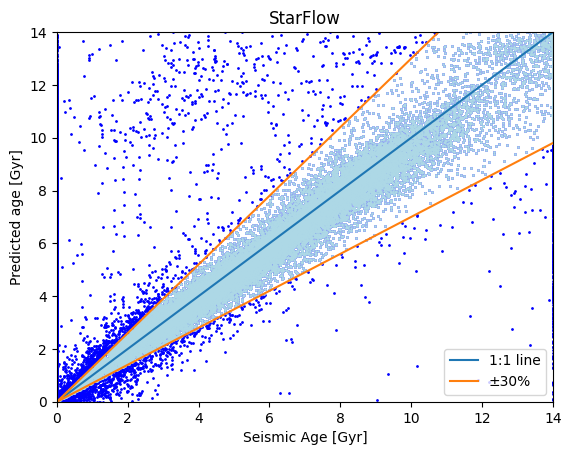

In [12]:
print ('With ', neurons_per_layer, 'neurons per layer, ', layers, 'layers, and ', iterations, 'iterations')
print ('using the training set', trainbin)
print (len(goodfit[0])/len(y_test)*100, 'percent of the ages are good')
print (len(badfit[0])/len(y_test)*100, 'percent of the ages are bad')
plt.scatter( (y_test*scaling_y),(predictions*scaling_y), s=1, color='blue')
plt.scatter( (y_test[goodfit]*scaling_y),(predictions[goodfit]*scaling_y), s=1, color='lightblue')
plt.xlim(0.,14.)
plt.xlim(0.,14.)
plt.plot([0.,14.], [0.,14.], label='1:1 line')
plt.plot([14,0,14], [14*(1-metric), 0, 14*(1+metric)], label='±30%')
plt.ylabel(r'Predicted age [Gyr]')
plt.xlabel(r'Seismic Age [Gyr]')
plt.title("StarFlow")
plt.legend()
plt.ylim(0,14)
print(matched_starflow['age'].min(), matched_starflow['age'].max())


In [13]:
#Starflow age versus predicted age NN
delta = predictions - y_test
delta = (predictions - y_test) * scaling_y
y_test_actual = y_test * scaling_y

/var/folders/ct/3p6ngzhj6xbcrqtyd_rkdsn00000gn/T/ipykernel_1189/2858978899.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


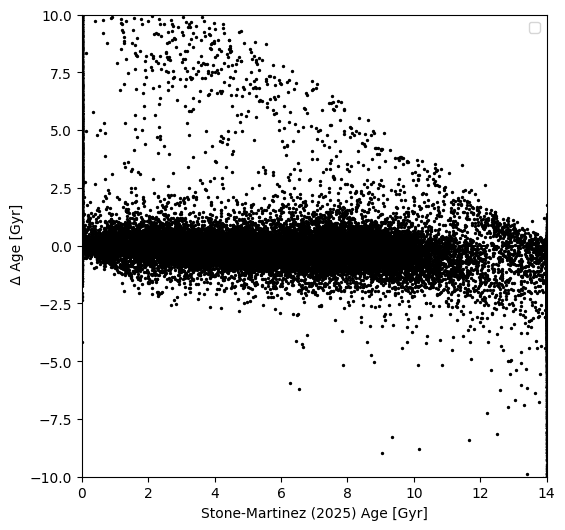

In [14]:
eps = 1e-6  # very small number to avoid zero
goodfit = (predictions / (y_test + eps) > 1 - metric) & (predictions / (y_test + eps) < 1 + metric)
badfit  = ~goodfit


plt.figure(figsize=(6,6))
plt.scatter(y_test_actual[goodfit], delta[goodfit], s=2, color='black')
plt.scatter(y_test_actual[badfit],  delta[badfit],  s=2, color='black')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel("Stone-Martinez (2025) Age [Gyr]")
plt.ylabel(" Δ Age [Gyr]")
plt.xlim(y_test_actual.min(), y_test_actual.max())
plt.ylim(-10, 10)
plt.legend()
plt.show()